In [1]:
import openslide
import glob
from PIL import Image
import pandas as pd
from functools import reduce
import operator
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

/usr/local/lib/python3.4/dist-packages/matplotlib-1.5.1+1797.g6bed1be-py3.4-linux-x86_64.egg/matplotlib/backends/backend_gtk3agg.py:18: UserWarning: The Gtk3Agg backend is known to not work on Python 3.x with pycairo. Try installing cairocffi.
  "The Gtk3Agg backend is known to not work on Python 3.x with pycairo. "


In [3]:
files = glob.glob("data/*.ndpi")

In [34]:
groundTruth = pd.read_csv("data/groundTruth.csv")

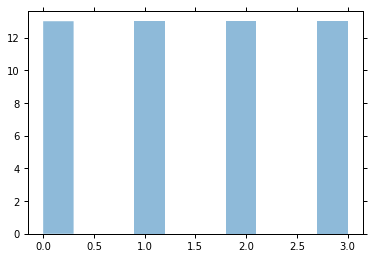

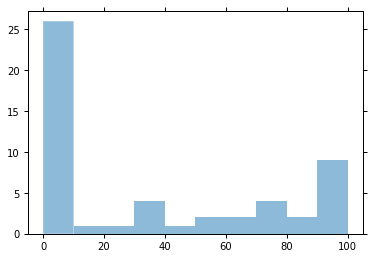

In [5]:
scores = groundTruth[["HeR2 SCORE"]].values
percentageScores = groundTruth[["PERCENTAGE CELLS WITH COMPLETE MEMBRANE STAINING IRRESPECTIVE OF INTENSITY"]].values
plt.hist(scores,alpha=0.5)
plt.show()
plt.hist(percentageScores,alpha=0.5)
plt.show()

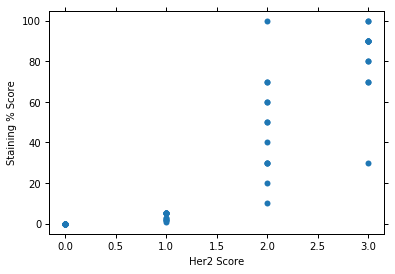

In [24]:
plt.scatter(scores,percentageScores)
plt.title("")
plt.xlabel("Her2 Score")
plt.ylabel("Staining % Score")
plt.show()

In [47]:
data = []
for wsi in files:
    obs = openslide.open_slide(wsi)
    nPixels = reduce(operator.mul,obs.dimensions)
    data.append({"dimension":obs.dimensions,"nPix":nPixels,"levelCount":obs.level_count,
                "levelDimensions":obs.level_dimensions})
df = pd.DataFrame(data)
print(df.shape)
df.head()

(83, 4)


,dimension,levelCount,levelDimensions,nPix
0,"(163840, 55296)",12,"((163840, 55296), (81920, 27648), (40960, 1382...",9059696640
1,"(40960, 47872)",9,"((40960, 47872), (20480, 23936), (10240, 11968...",1960837120
2,"(77824, 49152)",12,"((77824, 49152), (38912, 24576), (19456, 12288...",3825205248
3,"(143360, 59392)",12,"((143360, 59392), (71680, 29696), (35840, 1484...",8514437120
4,"(57344, 56064)",9,"((57344, 56064), (28672, 28032), (14336, 14016...",3214934016


In [37]:
def getRegion(caseNo,level):
    obs = openslide.open_slide('data/'+str(caseNo)+'_HER2.ndpi')
    dims = obs.level_dimensions[level]
    #print("Level dimensions ", dims)
    region = obs.read_region((0,0),level,(dims[0],dims[1]))
    return region

def label(caseNo):
    case = groundTruth.loc[groundTruth.CaseNo==caseNo]
    return case["HeR2 SCORE"].values[0], case["PERCENTAGE CELLS WITH COMPLETE MEMBRANE STAINING IRRESPECTIVE OF INTENSITY"].values[0]

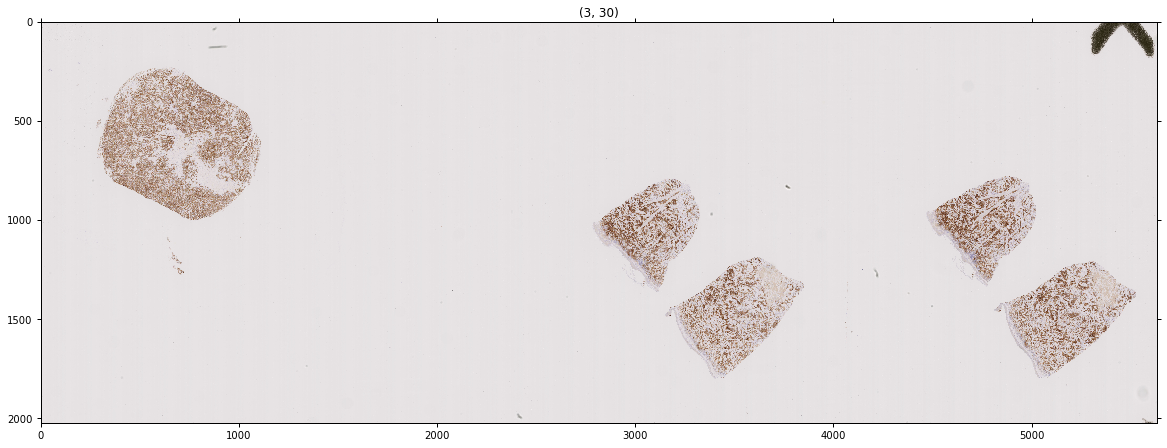

In [42]:
caseNo = 19
level = 5
plt.figure(figsize=(20,20))
plt.imshow(getRegion(caseNo,level))
plt.title(label(caseNo))
plt.show()

In [46]:
np.asarray(getRegion(caseNo,level)).shape

(2024, 5632, 4)

In [94]:
regionArray = np.asarray(region)

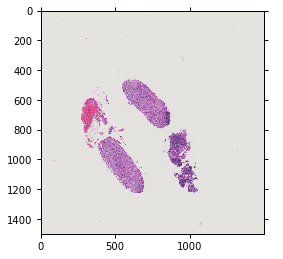

In [102]:
plt.imshow(regionArray[:1500,:1500])

In [14]:
case = groundTruth.loc[groundTruth["CaseNo"]==caseNo]

In [29]:
case["HeR2 SCORE"].values[0]

3